In [1]:
import sys
print(sys.version)

3.10.14 | packaged by Anaconda, Inc. | (main, May  6 2024, 19:44:50) [MSC v.1916 64 bit (AMD64)]


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, regularizers
from keras.layers import Flatten, add, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping


print("TensorFlow version:", tf.__version__)
tf.keras.backend.set_floatx('float64')

TensorFlow version: 2.10.0


In [3]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
import csv
import random

import cv2
import glob
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [4]:
#Wczytanie etykiet do treninegu

with open('../../Dataset_both/Real/Szum/Train/train.csv',"r") as csvfile:
    lines = csvfile.readlines()
csvfile.close()

new = []

for i in lines:
    new.append(i.split(" "))


value_train = []
for i in new[0]:
    value_train.append(int(i))

print(len(value_train))

30240


In [11]:
#Wczytanie etykiet do walidacji

with open('../../Dataset_both/Real/Szum/Valid/valid.csv',"r") as csvfile:
    lines = csvfile.readlines()
csvfile.close()

new = []

for i in lines:
    new.append(i.split(" "))


value_valid = []
for i in new[0]:
    value_valid.append(int(i))

print(len(value_valid))

2520


In [12]:
#Wczytanie etykiet do testowania

with open('../../Dataset_both/Real/Test/test.csv',"r") as csvfile:
    lines = csvfile.readlines()
csvfile.close()

new = []

for i in lines:
    new.append(i.split(" "))


value_test = []
for i in new[0]:
    value_test.append(int(i))

print(len(value_test))

2520


In [13]:
#Wczytanie zdjęć treningowych (75% całego zbioru)
images_train = []
size = len(value_train)

for i in range(size):
    im = Image.open('../../Dataset_both/Real/Train/'+str(i)+'.png')
    arr_im = np.array(im)
    arr_im = arr_im / 255.0
    images_train.append(arr_im)
print(len(images_train))

15120


In [14]:
#Wczytanie zdjęć walidacji (12,5% całego zbioru)
images_valid = []
size = len(value_valid)

for i in range(size):
    im = Image.open('../../Dataset_both/Real/Valid/'+str(i)+'.png')
    arr_im = np.array(im)
    arr_im = arr_im / 255.0
    images_valid.append(arr_im)
print(len(images_valid))

2520


In [15]:
#Wczytanie zdjęć testowych (12,5% całego zbioru)
images_test = []
size = len(value_test)

for i in range(size):
    im = Image.open('../../Dataset_both/Real/Test/'+str(i)+'.png')
    arr_im = np.array(im)
    arr_im = arr_im / 255.0
    images_test.append(arr_im)
print(len(images_test))

2520


In [16]:
x_train = np.array(images_train)
y_train = np.array(value_train)

x_valid = np.array(images_valid)
y_valid = np.array(value_valid)

x_test = np.array(images_test)
y_test = np.array(value_test)

1


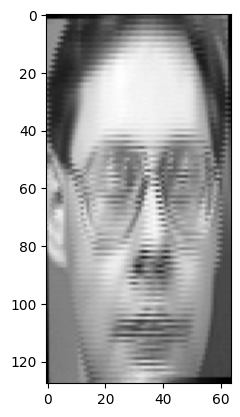

In [18]:
a = 1000
plt.imshow(x_train[a],cmap = 'gray')
print(y_train[a])

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='relu'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 62, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 14, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 30, 14, 32)       128       
 ormalization)                                                   
                                                        

In [32]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy','mse'])

#Funcka umożliwia zatrzymanie się uczenia
#gdy wartość strat przstanie maleć
EarlyStop = EarlyStopping(monitor='val_loss',
                          verbose=1,
                          patience=10)


ModelCheck = ModelCheckpoint(filepath='./Model_przeplatane_wiersze_2.h5',
                             monitor='val_loss',
                             save_best_only=True)

history = model.fit(x=x_train,
                    y=y_train,
                    epochs=100,
                    batch_size=128,
                    #validation_split=0.1,
                    validation_data = (x_valid, y_valid),
                    callbacks = [EarlyStop, ModelCheck]
                   )

Epoch 1/100
119/119 [==============================] - 26s 209ms/step - loss: 0.1456 - accuracy: 0.8579 - mse: 0.1456 - val_loss: 0.5000 - val_accuracy: 0.5000 - val_mse: 0.5000
Epoch 2/100
119/119 [==============================] - 24s 204ms/step - loss: 0.0211 - accuracy: 0.9830 - mse: 0.0211 - val_loss: 0.5000 - val_accuracy: 0.5000 - val_mse: 0.5000
Epoch 3/100
119/119 [==============================] - 26s 215ms/step - loss: 0.0138 - accuracy: 0.9915 - mse: 0.0138 - val_loss: 0.5000 - val_accuracy: 0.5000 - val_mse: 0.5000
Epoch 4/100
119/119 [==============================] - 27s 229ms/step - loss: 0.0095 - accuracy: 0.9951 - mse: 0.0095 - val_loss: 0.5000 - val_accuracy: 0.5000 - val_mse: 0.5000
Epoch 5/100
119/119 [==============================] - 28s 237ms/step - loss: 0.0077 - accuracy: 0.9978 - mse: 0.0077 - val_loss: 0.1739 - val_accuracy: 0.7512 - val_mse: 0.1739
Epoch 6/100
119/119 [==============================] - 28s 233ms/step - loss: 0.0055 - accuracy: 0.9987 - mse:

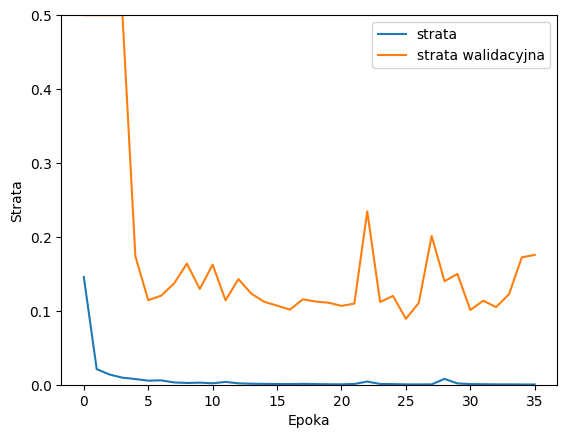

In [39]:
plt.plot(history.history['loss'], label='strata')
plt.plot(history.history['val_loss'], label = 'strata walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.ylim([0.0, 0.5])
plt.legend(loc='upper right')

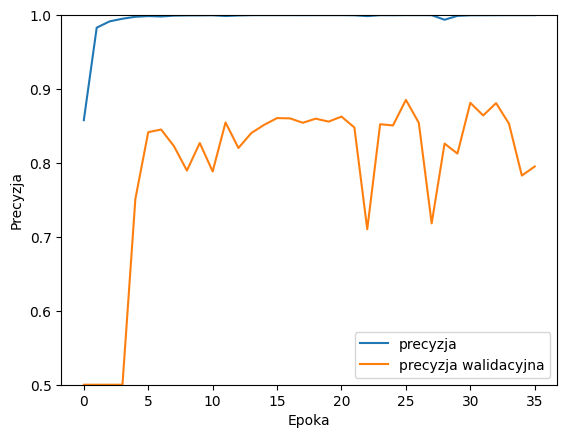

In [40]:
plt.plot(history.history['accuracy'], label='precyzja')
plt.plot(history.history['val_accuracy'], label = 'precyzja walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Precyzja')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [41]:
best_model = tf.keras.models.load_model('./Model_przeplatane_wiersze_2.h5')


In [42]:
best_model.evaluate(x_test,  y_test, verbose=2)


79/79 - 2s - loss: 0.0756 - accuracy: 0.8980 - mse: 0.0756 - 2s/epoch - 27ms/step


[0.07564270834638993, 0.898015873015873, 0.07564270834638993]

In [37]:
predict_x = best_model.predict(x_test)

predictions = (predict_x > 0.5).astype("int32")

79/79 [==============================] - 2s 21ms/step


In [38]:
names = [['Tn','Nn'],['Np', 'Tp']]
names = np.reshape(names,(2,2))
print(names)

conf = tf.math.confusion_matrix(y_test,predictions)

print(conf)

[['Tn' 'Nn']
 ['Np' 'Tp']]
tf.Tensor(
[[1224   36]
 [ 221 1039]], shape=(2, 2), dtype=int32)
